In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder # Nominal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import artifact

In [2]:
df = pd.read_csv("clean_data.csv")

In [3]:
df

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min,Time_taken (min)
0,0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,21.0,55.0,22.0,10.0,46
1,1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,14.0,55.0,15.0,5.0,23
2,2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,17.0,30.0,17.0,40.0,21
3,3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,9.0,20.0,9.0,30.0,20
4,4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,19.0,50.0,20.0,5.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,motorcycle,0.0,No,Metropolitian,11.0,35.0,11.0,45.0,32
45580,45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,19.0,55.0,20.0,10.0,36
45581,45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,scooter,0.0,No,Metropolitian,23.0,50.0,24.0,5.0,16
45582,45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,13.0,35.0,13.0,40.0,26


In [4]:
x = df.drop(labels=["Time_taken (min)",'Unnamed: 0'],axis=1)
y = df[["Time_taken (min)"]]

In [5]:
x.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,19.0,50.0,20.0,5.0


In [6]:
df["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [7]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [8]:
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_order_hour', 'Time_order_min',
       'Time_order_picked_hour', 'Time_order_picked_min'],
      dtype='object')

In [9]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

## Categorical Pipeline
ohe_transformer = OneHotEncoder()
    
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('OneHotEncoder',ohe_transformer,categorical_cols)
])

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [11]:
x_train

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
5755,36.0,4.1,22.310329,73.169083,22.380329,73.239083,Sandstorms,Jam,0,motorcycle,0.0,No,Metropolitian,21.0,40.0,21.000,50.0
9163,29.0,3.6,22.310526,73.170937,22.370526,73.230937,Sunny,Jam,0,motorcycle,3.0,Yes,Urban,21.0,10.0,21.000,15.0
16410,31.0,4.8,26.473698,80.352677,26.493698,80.372677,Windy,Low,2,scooter,1.0,No,Metropolitian,10.0,45.0,10.000,55.0
36945,33.0,4.2,15.157944,73.950889,15.287944,74.080889,Windy,Jam,2,scooter,1.0,No,Metropolitian,19.0,15.0,19.000,30.0
14679,34.0,4.1,19.126630,72.829976,19.146630,72.849976,Windy,Low,0,motorcycle,1.0,No,Urban,8.0,45.0,0.375,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,37.0,4.9,26.474986,80.342796,26.494986,80.362796,Sunny,Low,1,motorcycle,0.0,No,Urban,8.0,25.0,8.000,35.0
33268,28.0,4.9,17.431477,78.400350,17.481477,78.450350,Fog,Medium,2,motorcycle,0.0,No,Metropolitian,17.0,40.0,17.000,45.0
44845,20.0,4.7,22.514585,88.393310,22.594585,88.473310,Fog,Low,2,scooter,1.0,No,Metropolitian,22.0,20.0,22.000,25.0
4517,34.0,4.6,12.970324,77.645748,12.990324,77.665748,Cloudy,Low,1,motorcycle,1.0,No,Metropolitian,8.0,55.0,9.000,10.0


In [13]:
X_train = pd.DataFrame(preprocessor.fit_transform(x_train))
X_test = pd.DataFrame(preprocessor.transform(x_test))

In [14]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.124025,-1.623440,0.647373,0.131167,0.669961,0.116679,-1.223528,-1.318236,0.771107,0.527442,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.106505,-3.143059,0.647397,0.131248,0.668629,0.116295,-1.223528,3.943714,0.771107,-1.710538,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.245075,0.504025,1.156141,0.443938,1.228657,0.452410,1.160323,0.435747,-0.945003,0.900438,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.596655,-1.319517,-0.226656,0.165206,-0.293358,0.156297,1.160323,0.435747,0.459087,-1.337541,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.772445,-1.623440,0.258322,0.116402,0.230746,0.098366,-1.223528,0.435747,-1.257023,0.900438,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31903,1.299815,0.807948,1.156298,0.443508,1.228832,0.451945,-0.031602,-1.318236,-1.257023,-0.591548,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
31904,-0.282295,0.807948,0.051172,0.358934,0.004577,0.361939,1.160323,-1.318236,0.147067,0.527442,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
31905,-1.688616,0.200101,0.672333,0.794024,0.699062,0.833653,1.160323,0.435747,0.927117,-0.964545,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
31906,0.772445,-0.103822,-0.493985,0.326079,-0.605431,0.325013,-0.031602,0.435747,-1.257023,1.646431,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [15]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,  rmse, r2_square

In [16]:
models = {
    "Linear_Regression":LinearRegression(),
    "Lasso":Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
    
}

trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')
    

Linear_Regression
Model Training Performance
RMSE: 6.2891957433621615
MAE: 4.965870940082078
R2 score 54.27016413174428


Lasso
Model Training Performance
RMSE: 7.4703131787229005
MAE: 5.91217746767673
R2 score 35.48108767403756


Ridge
Model Training Performance
RMSE: 6.289211675064892
MAE: 4.965897454345535
R2 score 54.26993244708904


Elasticnet
Model Training Performance
RMSE: 7.571946280137062
MAE: 6.032054482116377
R2 score 33.71359479391957




In [17]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
0,Linear_Regression,0.542702
2,Ridge,0.542699
1,Lasso,0.354811
3,Elasticnet,0.337136


In [19]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %2f"%score)

Accuracy of the model is 54.270164


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

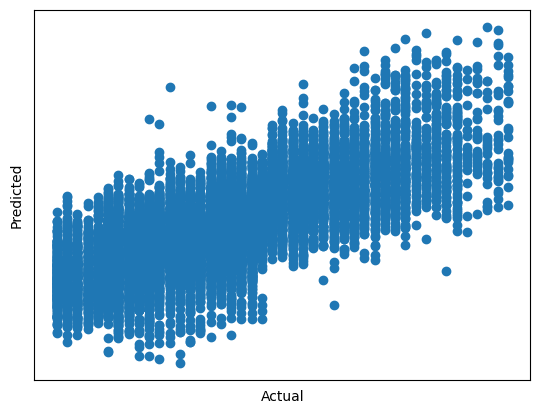

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.xticks(())
plt.yticks(())

plt.show()